In [1]:
## importing things
import numpy as np
import matplotlib.pyplot as plt
from models.approximator import LinearApproximator
from systems.system import TrainableDynamicalSystem
from systems.utils import load_vectorfield
from systems.utils import plot_vector_field, plot_2D_trajectory
from models.utils import compute_mse

In [2]:
# loading vector data
x0, x1 = load_vectorfield('../data/vector_field_linear.txt')

In [3]:
# Parameters
delta_t = 0.1

## Part 1: Estimate the linear vector field


In [4]:
print("\nPart 1: Estimating linear vector field...")

# Create linear approximator and trainable system
linear_approximator = LinearApproximator(rcond=1e-6)
system = TrainableDynamicalSystem(approximator=linear_approximator)


Part 1: Estimating linear vector field...


In [5]:
# Fit the system to data
system.fit(x0, x1, delta_t)

# Extract the learned matrix A
A_estimated = system.approximator._weights
print(f"Estimated matrix A:\n{A_estimated}")

Estimated matrix A:
[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


## Part 2: Solve system and compute MSE


In [6]:
# Simulate from all initial points
x1_predicted = system.batch_simulate(x0, delta_t, n_evals=None)

# Compute mean squared error
mse = compute_mse(x1, x1_predicted)

In [7]:
print(f"Mean squared error: {mse:.6f}")

Mean squared error: 0.000010


## Part 3: Long-term simulation and visualization


In [8]:
# Choose initial point far from data
initial_point = np.array([10.0, 10.0])
T_end = 100.0
n_points = 1000

# Simulate trajectory
trajectory = system.simulate(initial_point, T_end, n_evals=n_points)

# Create phase portrait
x_range = np.linspace(-10, 10, 20)
y_range = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_range, y_range)

In [9]:
# Compute vector field on grid
grid_points = np.column_stack([X.flatten(), Y.flatten()])
vectors = np.array([system._get_tangent(0, point) for point in grid_points])
U = vectors[:, 0].reshape(X.shape)
V = vectors[:, 1].reshape(X.shape)

### Plots

/Users/hirmay/Downloads/mlcs/mlicms25ex5-groupa/src/systems/utils.py:161: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 600x600 with 0 Axes>

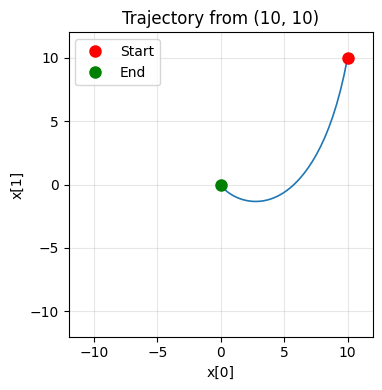

In [10]:
plt.figure(figsize=(6, 6))

# Plot 1: Trajectory
fig, ax = plt.subplots(figsize=(4,4))

plot_2D_trajectory(ax, trajectory, lw=1.2)
ax.set_title("Trajectory from (10,10)")
fig.tight_layout()

plt.plot(initial_point[0], initial_point[1], 'ro', markersize=8, label='Start')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'go', markersize=8, label='End')

# Setting plot properties
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.title('Trajectory from (10, 10)')
plt.legend()

# Save and show the plot
plt.savefig("trajectory.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 600x600 with 0 Axes>

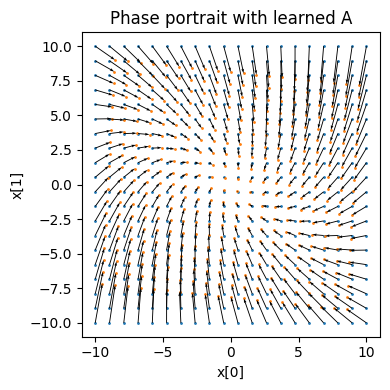

In [11]:
# second plot
plt.figure(figsize=(6, 6))

# Plot 2: Phase portrait
fig, ax = plt.subplots(figsize=(4,4))

# x_grid, y_grid contain the mesh you already built
grid_points = np.column_stack([X.ravel(), Y.ravel()])
vectors     = np.array([system._get_tangent(0, p) for p in grid_points])

plot_vector_field(
        ax,
        grid_points,                            
        grid_points + vectors * 0.2         
)
ax.set_title("Phase portrait with learned A")
plt.tight_layout()
plt.savefig("phase_portrait.png", dpi=300)


# Save and show the plot
plt.savefig("phase_portrait.png", dpi=300, bbox_inches='tight')
plt.show()


### Additional Analysis

In [12]:
    # Additional analysis
    print(f"\nTrajectory analysis:")
    print(f"Final position: ({trajectory[-1, 0]:.3f}, {trajectory[-1, 1]:.3f})")
    
    # Check eigenvalues for stability analysis
    eigenvals, eigenvecs = np.linalg.eig(A_estimated)
    print(f"Eigenvalues of A: {eigenvals}")
    print(f"Real parts: {eigenvals.real}")
    
    if all(eigenvals.real < 0):
        print("System is stable (all eigenvalues have negative real parts)")
    elif all(eigenvals.real > 0):
        print("System is unstable (all eigenvalues have positive real parts)")
    else:
        print("System is a saddle point (mixed eigenvalue signs)")


Trajectory analysis:
Final position: (-0.000, 0.000)
Eigenvalues of A: [-0.72546409+0.23191149j -0.72546409-0.23191149j]
Real parts: [-0.72546409 -0.72546409]
System is stable (all eigenvalues have negative real parts)
